In [1]:
FREECADPATH = "C:/Anaconda3/pkgs/freecad-0.17-py36_11/Library/bin"

In [55]:
import sys
import numpy as np
from matplotlib import pyplot as plt

In [3]:
sys.path.append(FREECADPATH)

In [4]:
from FreeCAD import Part

In [5]:
model = Part.read("./mesh.stp")

In [24]:
line = Part.makeLine((0.5, 1.025, -1), (0.5, 1.025, 0))

In [25]:
dist = model.Shells[0].distToShape(line)
print(dist)

(0.0, [(Vector (0.5, 1.025, -0.04330127018922281), Vector (0.5, 1.025, -0.04330127018922281))], [(b'Face', 34, (8.377580409572772, 0.5), b'Edge', 0, 0.9566987298107772)])


In [26]:
info = dist[2][0]
print(info)

(b'Face', 34, (8.377580409572772, 0.5), b'Edge', 0, 0.9566987298107772)


In [75]:
normal = model.Faces[info[1]].normalAt(info[2][0], info[2][1])
print(normal)
normal[1]

Vector (0.0, 1.0, -1.2246467991473532e-16)


1.0

In [28]:
type(normal)

Base.Vector

In [29]:
np.array(normal)

array([ 0.       ,  0.5      , -0.8660254])

In [120]:
y = np.arange(-.2,.2,0.0001)

In [121]:
ang = list()
zs = []
for y0 in y:
    line = Part.makeLine((0.5, y0, -1), (0.5, y0, 0))
    dist = model.Shells[0].distToShape(line)
    if dist[0] < 0.00001:
        info = dist[2][0]
        zs.append(dist[1][0][0][2])
        if info [0] == b'Face':
            normal = model.Faces[info[1]].normalAt(info[2][0], info[2][1])
            ang.append(normal[1]/normal[2])
        else:
            ang.append(np.NaN)
    else:
        ang.append(np.NaN)
ang = np.array(ang)
#ang[ang=="NaN"]=-1
#ang

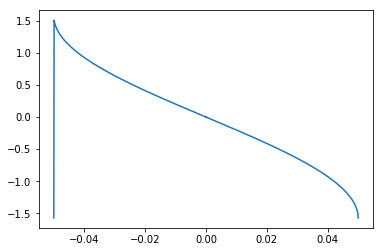

In [135]:
plt.plot(y,np.arctan(ang))
plt.show()


In [ ]:
zs

In [128]:
ang

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])